In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/heart_failure_clinical_records_dataset - heart_failure_clinical_records_dataset.csv")

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
#features:

# Age: The age of the patient (numeric).

# Anaemia: Indicates the presence of anemia (binary: 0 for no, 1 for yes).

# Creatinine Phosphokinase (CPK): Level of creatinine phosphokinase enzyme in the blood (numeric).

# Diabetes: Indicates whether the patient has diabetes (binary: 0 for no, 1 for yes).

# Ejection Fraction: Percentage of blood leaving the heart at each contraction (numeric).

# High Blood Pressure: Indicates whether the patient has high blood pressure (binary: 0 for no, 1 for yes).

# Platelets: Platelet count in the blood (numeric).

# Serum Creatinine: Level of creatinine in the blood (numeric).

# Serum Sodium: Level of sodium in the blood (numeric).

# Sex: Gender of the patient (binary: 0 for female, 1 for male).

# Smoking: Indicates whether the patient smokes (binary: 0 for no, 1 for yes).

# Time: Follow-up period (in days) for the patient's condition (numeric).

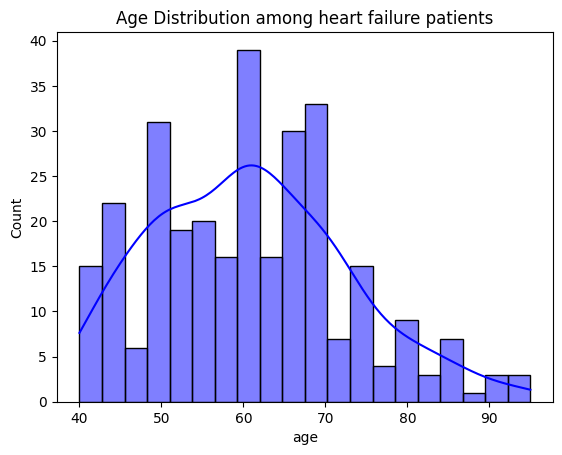

In [9]:
#1. What is the distribution of age among heart failure patients in the dataset.
plt.title("Age Distribution among heart failure patients")
sns.histplot(df.age,bins=20,color="blue",kde=True)
plt.show()

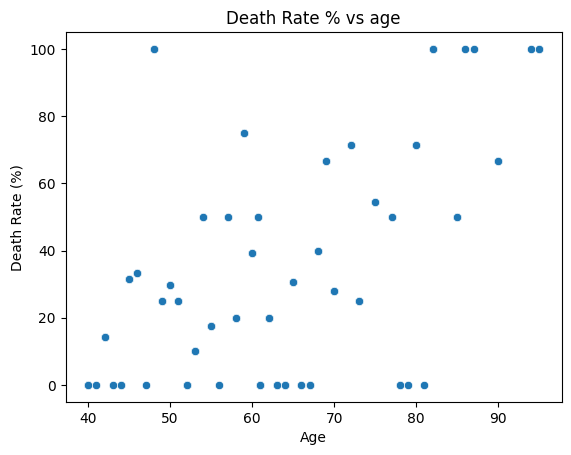

In [10]:
#2. How does the death rate vary with age?

# Define a function to calculate death rate for each age group
def assign_death_rate(row):
    age_group_deaths = df[(df['age'] == row['age']) & (df['DEATH_EVENT'] == 1)].shape[0]
    age_group_total = df[df['age'] == row['age']].shape[0]
    return round((age_group_deaths / age_group_total) * 100, 2)

# Apply the function to calculate death rate and create a new column 'Death_Rate'
df['Death_Rate'] = df.apply(assign_death_rate, axis=1)

# Plotting
sns.scatterplot(x=df.age, y=df.Death_Rate).set_title('Death Rate % vs age')
plt.xlabel('Age')
plt.ylabel('Death Rate (%)')
plt.show()

As the plot suggests, as age increases death rate also increasing

In [11]:
#3. What is the percentage of male and female patients in the dataset?

round(df.sex.value_counts(normalize=True)*100,2)
# Male patients = 64.88%
# female patients = 35.12%

1    64.88
0    35.12
Name: sex, dtype: float64

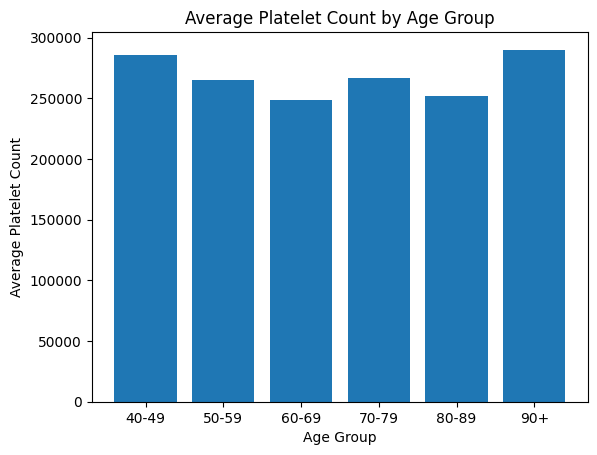

In [12]:
#4. How does the platelet count varies with different age groups

age_bins = [0,10,20,30,40,50,60,70,80,90,100]
age_labels = ['0-9','10-19','20-29', '30-39', '40-49', '50-59', '60-69','70-79','80-89','90+']

# Group the data by age groups and calculate the average platelet count
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
platelet_avg_by_age_group = df.groupby('age_group')['platelets'].mean()
# Plotting
plt.bar(platelet_avg_by_age_group.index, platelet_avg_by_age_group.values)
plt.xlabel('Age Group')
plt.ylabel('Average Platelet Count')
plt.title('Average Platelet Count by Age Group')
plt.show()

In [13]:
#5. Is there a correlation on between creatinine  and sodium levels in the blood

# Calculate the correlation coefficient
correlation = df['serum_creatinine'].corr(df['serum_sodium'])
correlation

-0.1890952100911741

<Axes: xlabel='serum_creatinine', ylabel='serum_sodium'>

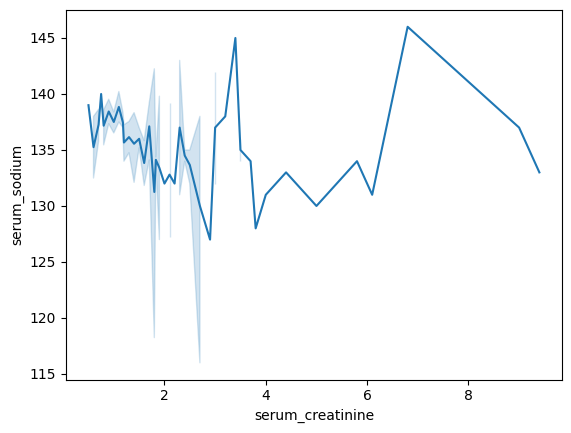

In [14]:
# The correlation coefficient between creatinine and serum sodium levels, as calculated to be approximately -0.189,
#  indicates a weak negative linear relationship between these two variables.


sns.lineplot(x='serum_creatinine',y='serum_sodium',data=df)

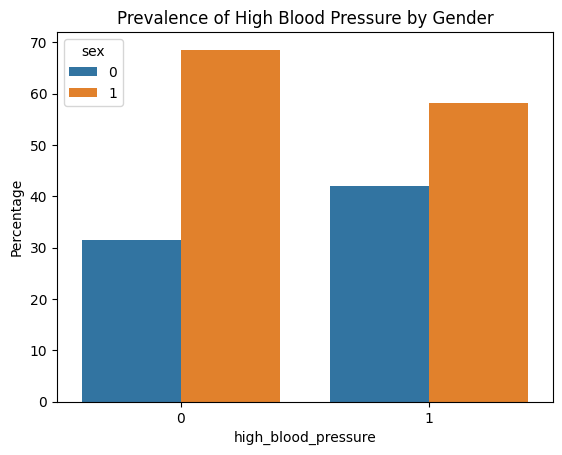

In [15]:
#6. How does the prevalence of blood pressure differ between the male and female patients?

df2 = pd.DataFrame(round(df.groupby('high_blood_pressure')['sex'].value_counts(normalize=True)*100,2))
df2.columns = ['Percentage']
df2 =df2.reset_index()
sns.barplot(x='high_blood_pressure',y='Percentage',data=df2,hue='sex').set_title('Prevalence of High Blood Pressure by Gender')
plt.show()

Text(0.5, 1.0, 'Smoking People count')

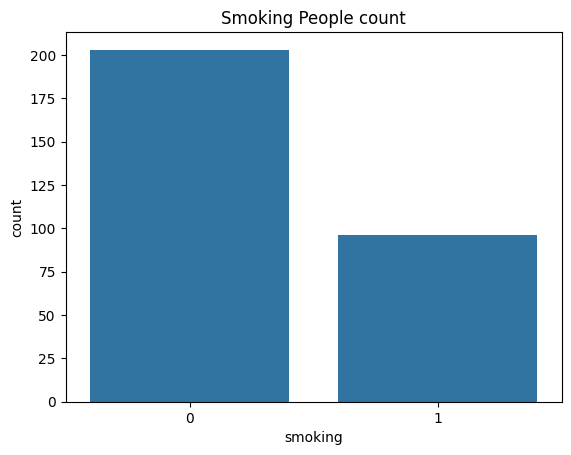

In [16]:
#7. what is the relationship between smoking habits and occurence of heart failure.

sns.countplot(x=df.smoking).set_title('Smoking People count')

#Non smokers are more in heart failure dataset

In [17]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'Death_Rate', 'age_group'],
      dtype='object')

<Axes: xlabel='age_group', ylabel='count'>

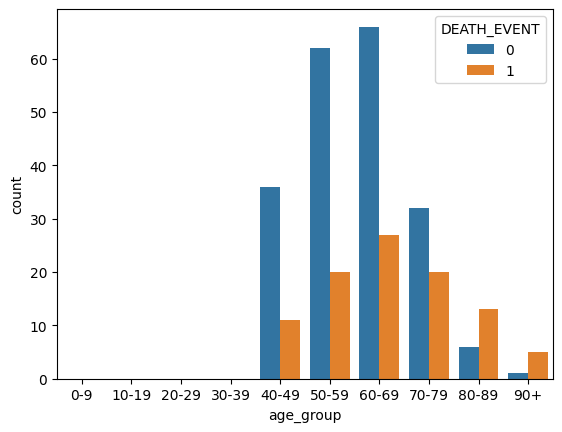

In [18]:
#8. Are there any noticible patterns in distribution of death event across different age group?

sns.countplot(x=df.age_group,hue=df.DEATH_EVENT)

It looks like normal distribution with average count of 25 with age group 60-69

In [20]:
#9. Is there is significance difference in ejection fraction between patients with and without diabetes?

df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'Death_Rate', 'age_group'],
      dtype='object')

In [30]:
df.groupby('diabetes')['ejection_fraction'].describe()

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,174.0,38.132184,12.247439,14.0,30.0,38.0,45.0,80.0
1,125.0,38.016000,11.283719,15.0,30.0,38.0,40.0,62.0


By looking ejection fraction mean of having diabetes or not , ejection fraction have no significant difference in it

In [34]:
from scipy.stats import ttest_ind

# Assuming you have a DataFrame named df with columns 'ejection_fraction' and 'diabetes'

# Separate ejection fraction values for diabetic and non-diabetic patients
diabetic_ef = df[df['diabetes'] == 1]['ejection_fraction']
non_diabetic_ef = df[df['diabetes'] == 0]['ejection_fraction']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(diabetic_ef, non_diabetic_ef)

# Print the result
print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: -0.08358970647234736
p-value: 0.9334389630426103


A p-value of 0.9334389630426103 indicates that there is no significant difference in ejection fraction between patients with and without diabetes at a typical significance level of 0.05. In other words, the difference in ejection fraction between the two groups is likely due to random variation rather than a true difference.

In [35]:
#10. How does the serum creatinine level vary between patients who survived and those who did not?

df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'Death_Rate', 'age_group'],
      dtype='object')

In [40]:
data = df.groupby('DEATH_EVENT')['serum_creatinine'].describe()
data

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,203.0,1.184877,0.654083,0.5,0.900,1.0,1.2,6.1
1,96.0,1.835833,1.468562,0.6,1.075,1.3,1.9,9.4


Text(0.5, 1.0, 'Death_event and Serum Creatinine Mean values')

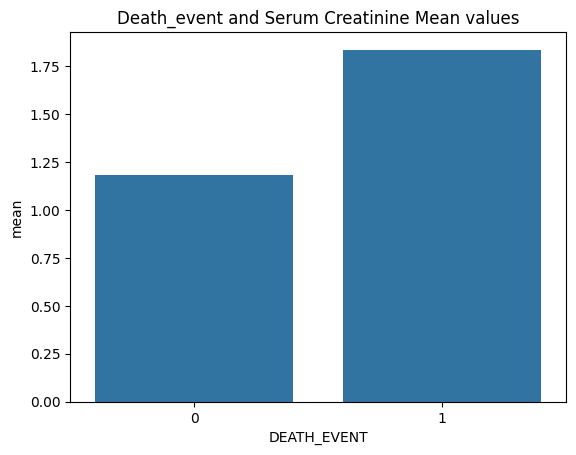

In [44]:
sns.barplot(x='DEATH_EVENT',y='mean',data=data).set_title('Death_event and Serum Creatinine Mean values')

Mean of serum_creatinine have significant difference in death_event
People who died have higher serum_creatinine levels

In [38]:
from scipy.stats import ttest_ind

# Assuming you have a DataFrame named df with columns 'ejection_fraction' and 'diabetes'

# Separate ejection fraction values for diabetic and non-diabetic patients
death = df[df['DEATH_EVENT'] == 1]['serum_creatinine']
alive = df[df['DEATH_EVENT'] == 0]['serum_creatinine']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(death, alive)

# Print the result
print("t-statistic:", t_statistic)
print("p-value:", p_value)



t-statistic: 5.306457599754319
p-value: 2.1901978548979685e-07


In the context of serum creatinine levels between two groups (e.g., patients who survived and those who did not survive), a small p-value suggests that there is a significant difference in serum creatinine levels between the two groups.